In [1]:
import numpy as np
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import geopandas as gpd

one_hot_df = pd.read_csv('Data/allData/PrisonAdmissionsCleanOneHotEncoding.csv')

In [2]:
# code followed from https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

shapefile = 'cb_2018_us_state_500k.shp'

# Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['STUSPS', 'geometry']]

# Rename columns
gdf.columns = ['state', 'geometry']

In [3]:
# for each state, get the total number of admissions
state_codes = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "FL", "GA", "HI", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NY", "NC", "ND", "OH", "OK", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "WA", "WV", "WI", "WY"]
state_admissions = []
for state in state_codes:
    state_admissions.append((one_hot_df[one_hot_df[state] == 1].shape[0], state))

# sort the states by number of admissions
state_admissions.sort(key=lambda x: x[0], reverse=True)

# print the top 10 states
print(state_admissions[:10])

[(1157148, 'TX'), (651490, 'NY'), (636180, 'IL'), (584090, 'FL'), (536405, 'NC'), (345543, 'AZ'), (314390, 'SC'), (282167, 'MO'), (264644, 'PA'), (262756, 'IN')]


In [169]:
# iterate through each state and get the total numbeer of prisoners
state_codes = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "FL", "GA", "HI", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NY", "NC", "ND", "OH", "OK", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "WA", "WV", "WI", "WY"]
total_prisoners = []
for state in state_codes:
    new_df = one_hot_df[one_hot_df[state] == 1]
    num_of_years = new_df['ADMITYR'].nunique()
    num_of_prisoners = len(new_df)
    if num_of_years == 0:
        total_prisoners.append(np.nan)
    else:
        total_prisoners.append(num_of_prisoners/num_of_years)

# create a new dataframe with two columns, state and prisoners
prisoners = pd.DataFrame({'state': state_codes, 'prisoners': total_prisoners})

# Merge dataframes gdf and prisoners
total_merged = gdf.merge(prisoners, left_on = 'state', right_on = 'state')



In [168]:
# iterate through each state and get the highest race percentage

highest_race = []
for state in state_codes:
    new_df = one_hot_df[one_hot_df[state] == 1]
    black = len(new_df[new_df['black'] == 1])
    white = len(new_df[new_df['white'] == 1])
    hispanic = len(new_df[new_df['hispanic'] == 1])
    other = len(new_df[new_df['other'] == 1])

    # get which one is the highest
    highest = max(black, white, hispanic, other)
    if highest == black:
        highest_race.append(2)
    elif highest == white:
        highest_race.append(1)
    elif highest == hispanic:
        highest_race.append(3)
    else:
        highest_race.append(4)


# create a new dataframe with two columns, state and race
races = pd.DataFrame({'state': state_codes, 'race': highest_race})

# Merge dataframes gdf and prisoners
race_merged = gdf.merge(races, left_on = 'state', right_on = 'state')
    

In [107]:
import geopandas as gpd
from matplotlib.colors import ListedColormap

color_map = ["#002473", "#0A85BA", "#ee9b00", "#7d176c", "#5b1427","#e7d498",  "#07403a", "#d15400", "#1d085b", "#91080c","#431a51", "#bb3e03",  "#DFA591", "#BD0058"]

font = {'fontname':'helvetica'}
# Define custom colormap
cmap = ListedColormap(['#0b6c96', '#87d5d2', '#e7d49b', '#ee9b00', '#ae2012', '#431a51', '#1d085b'])
sentence_map = ["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "\nLife, LWOP, Life + \nAdditional Years, Death"]

# create a dictionary with each element in sentence_map as a key and the corresponding color as the value
color_dict = {}
for i in range(len(sentence_map)):
    color_dict[sentence_map[i]] = color_map[i]

/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_14513/1547774292.py:42: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



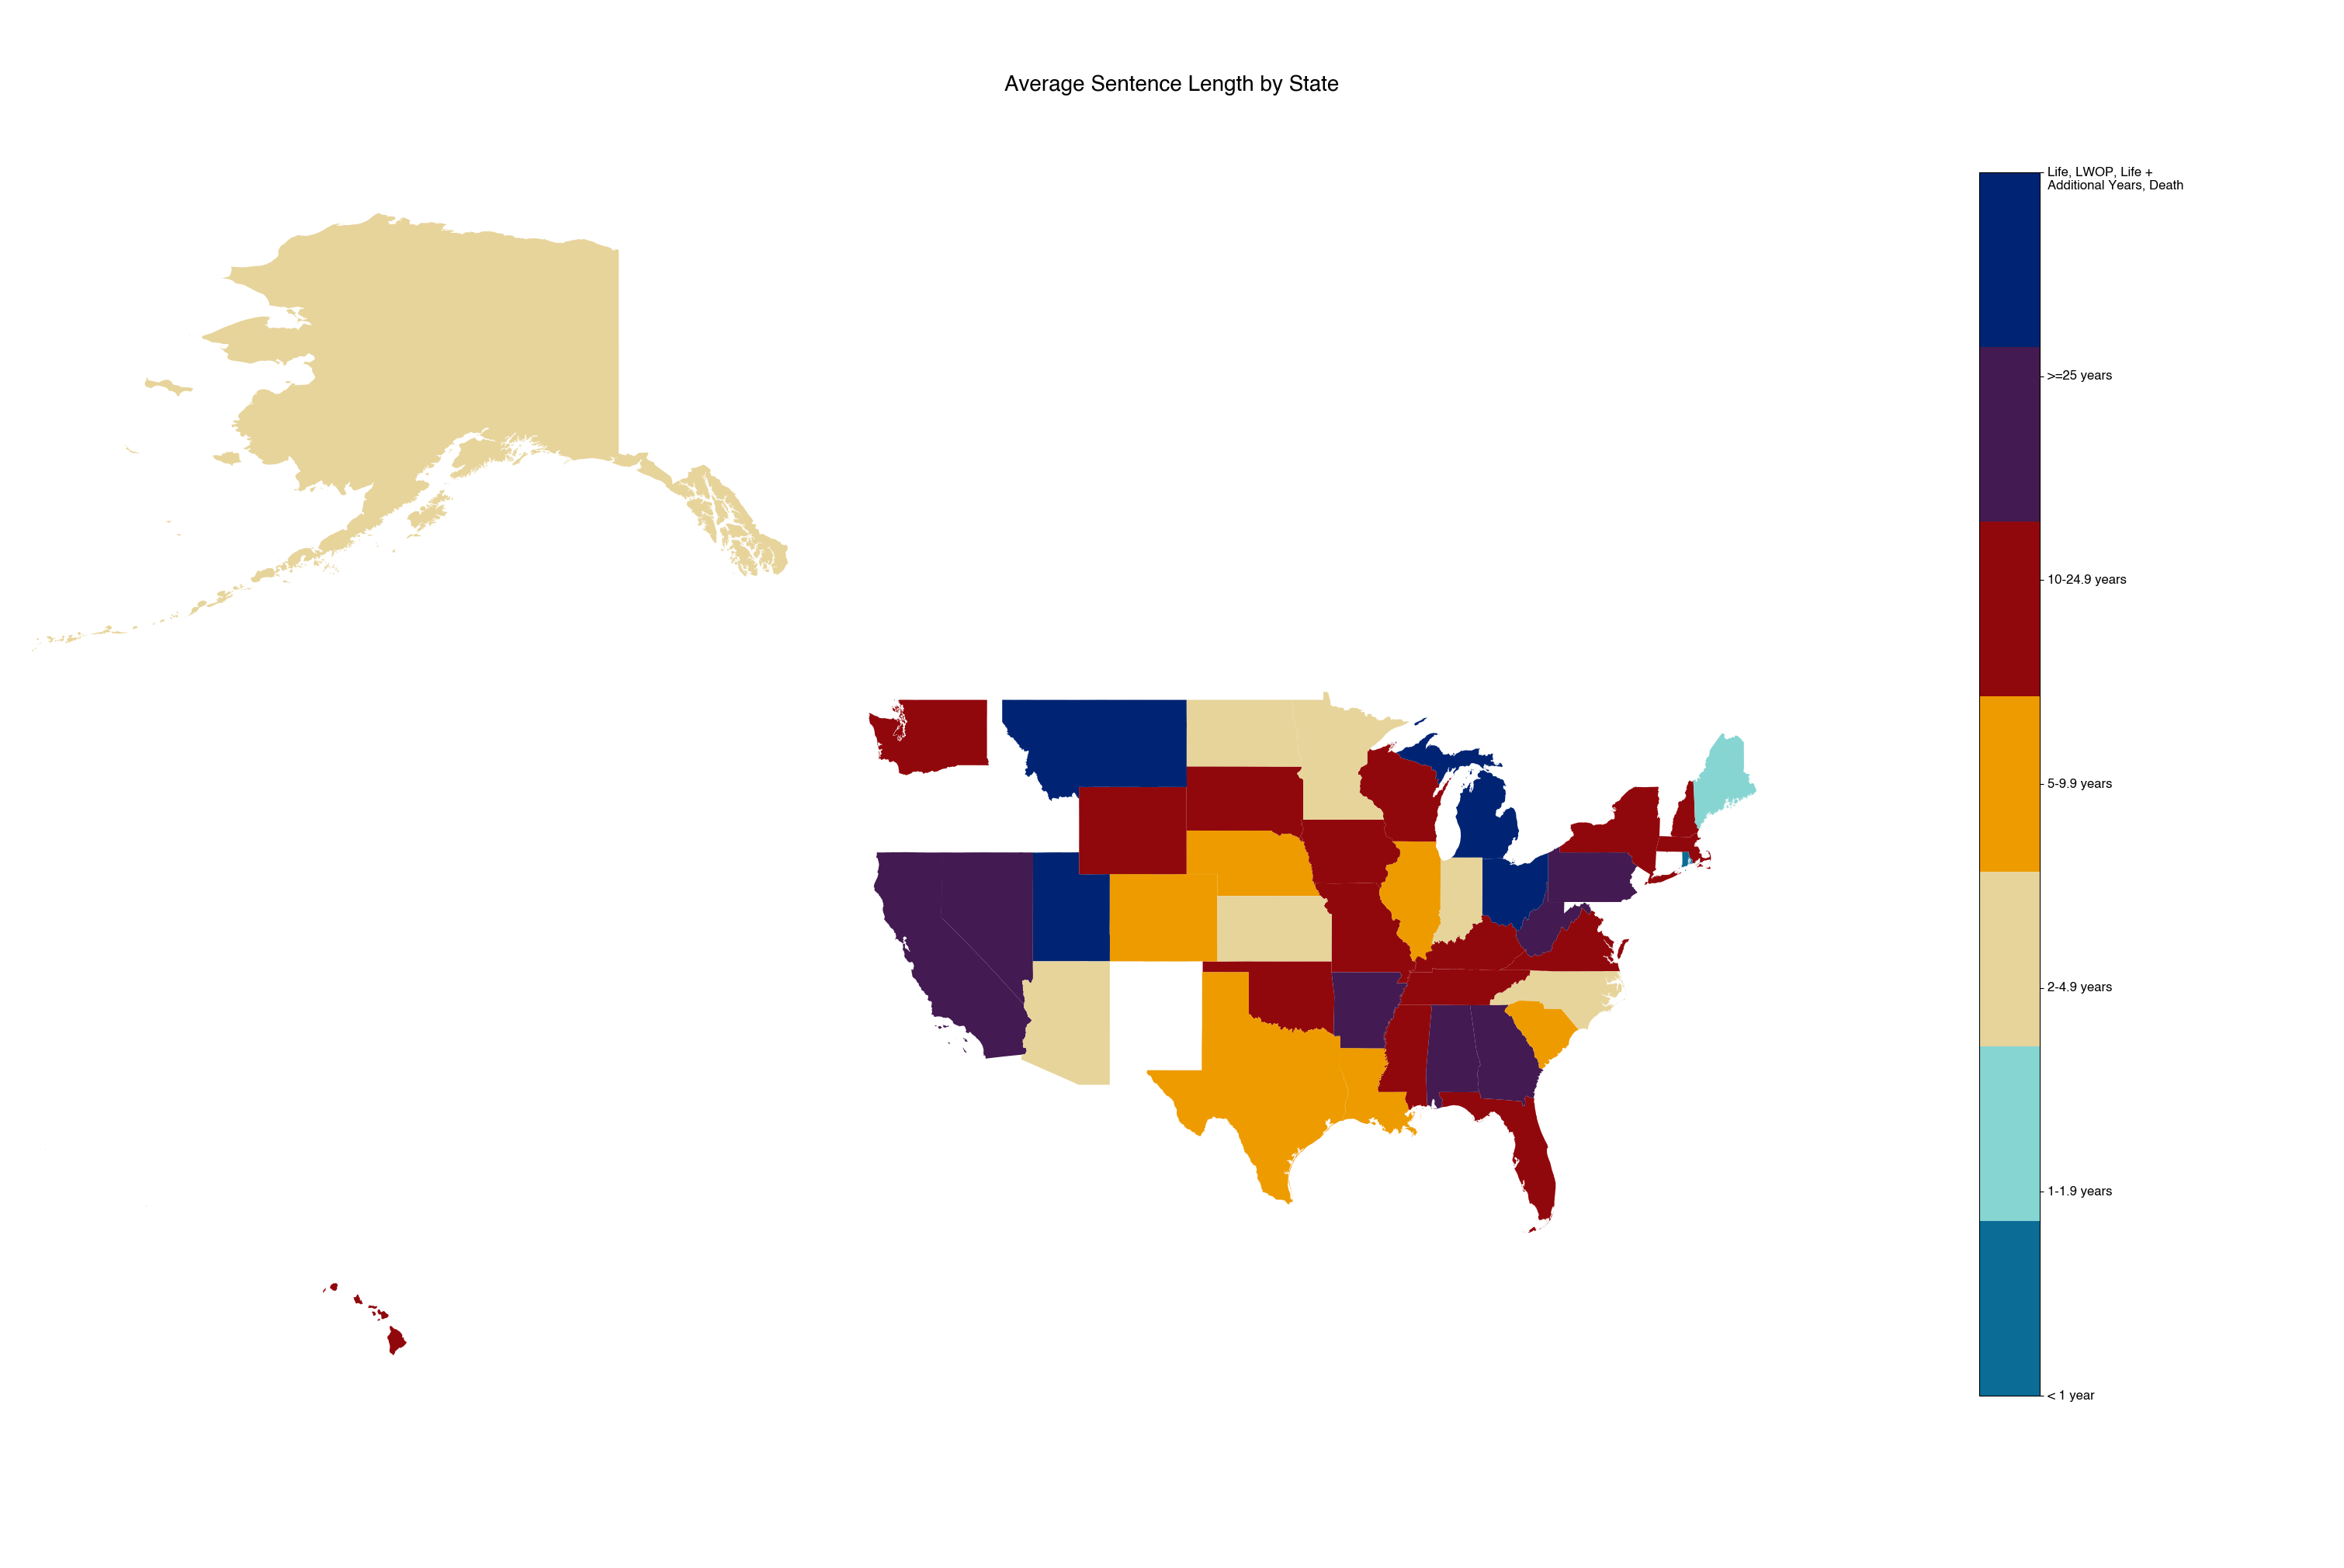

In [97]:
import plotly.express as px
import pandas as pd
import math 

sentence_length = []
for state in state_codes:
    new_df = one_hot_df[one_hot_df[state] == 1]
    new_df = new_df[new_df['OFFGENERAL'] == 1]
    sentence_length.append(new_df['SENTLGTH'].mean())

# create a new dataframe with two columns, state and sentence
sentences = pd.DataFrame({'state': state_codes, 'sentences': sentence_length})

# Merge dataframes gdf and prisoners
merged = gdf.merge(sentences, left_on = 'state', right_on = 'state')

fig, ax = plt.subplots(figsize=(30, 20))
# make the map bigger
merged.plot(ax=ax, column='sentences', cmap=cmap) 

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
# label the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.ax.set_yticks(np.linspace(0, 1, len(sentence_map)))
cbar.ax.set_yticklabels(sentence_map, **font, fontsize=12, verticalalignment='center')

# make the x axis shorter
plt.xlim(-180,-60)
# make the figure larger
plt.rcParams['figure.figsize'] = [20, 10]

# create a new axis for the title
ax_title = fig.add_axes([0, 0, 1, 1])
ax_title.set_axis_off()

# add the title to the center of the new axis
ax_title.text(0.5, 0.95, 'Average Sentence Length by State', ha='center', va='center', fontsize=20, **font)
ax.set_axis_off()

# cut out extra white space
plt.tight_layout()

plt.show()

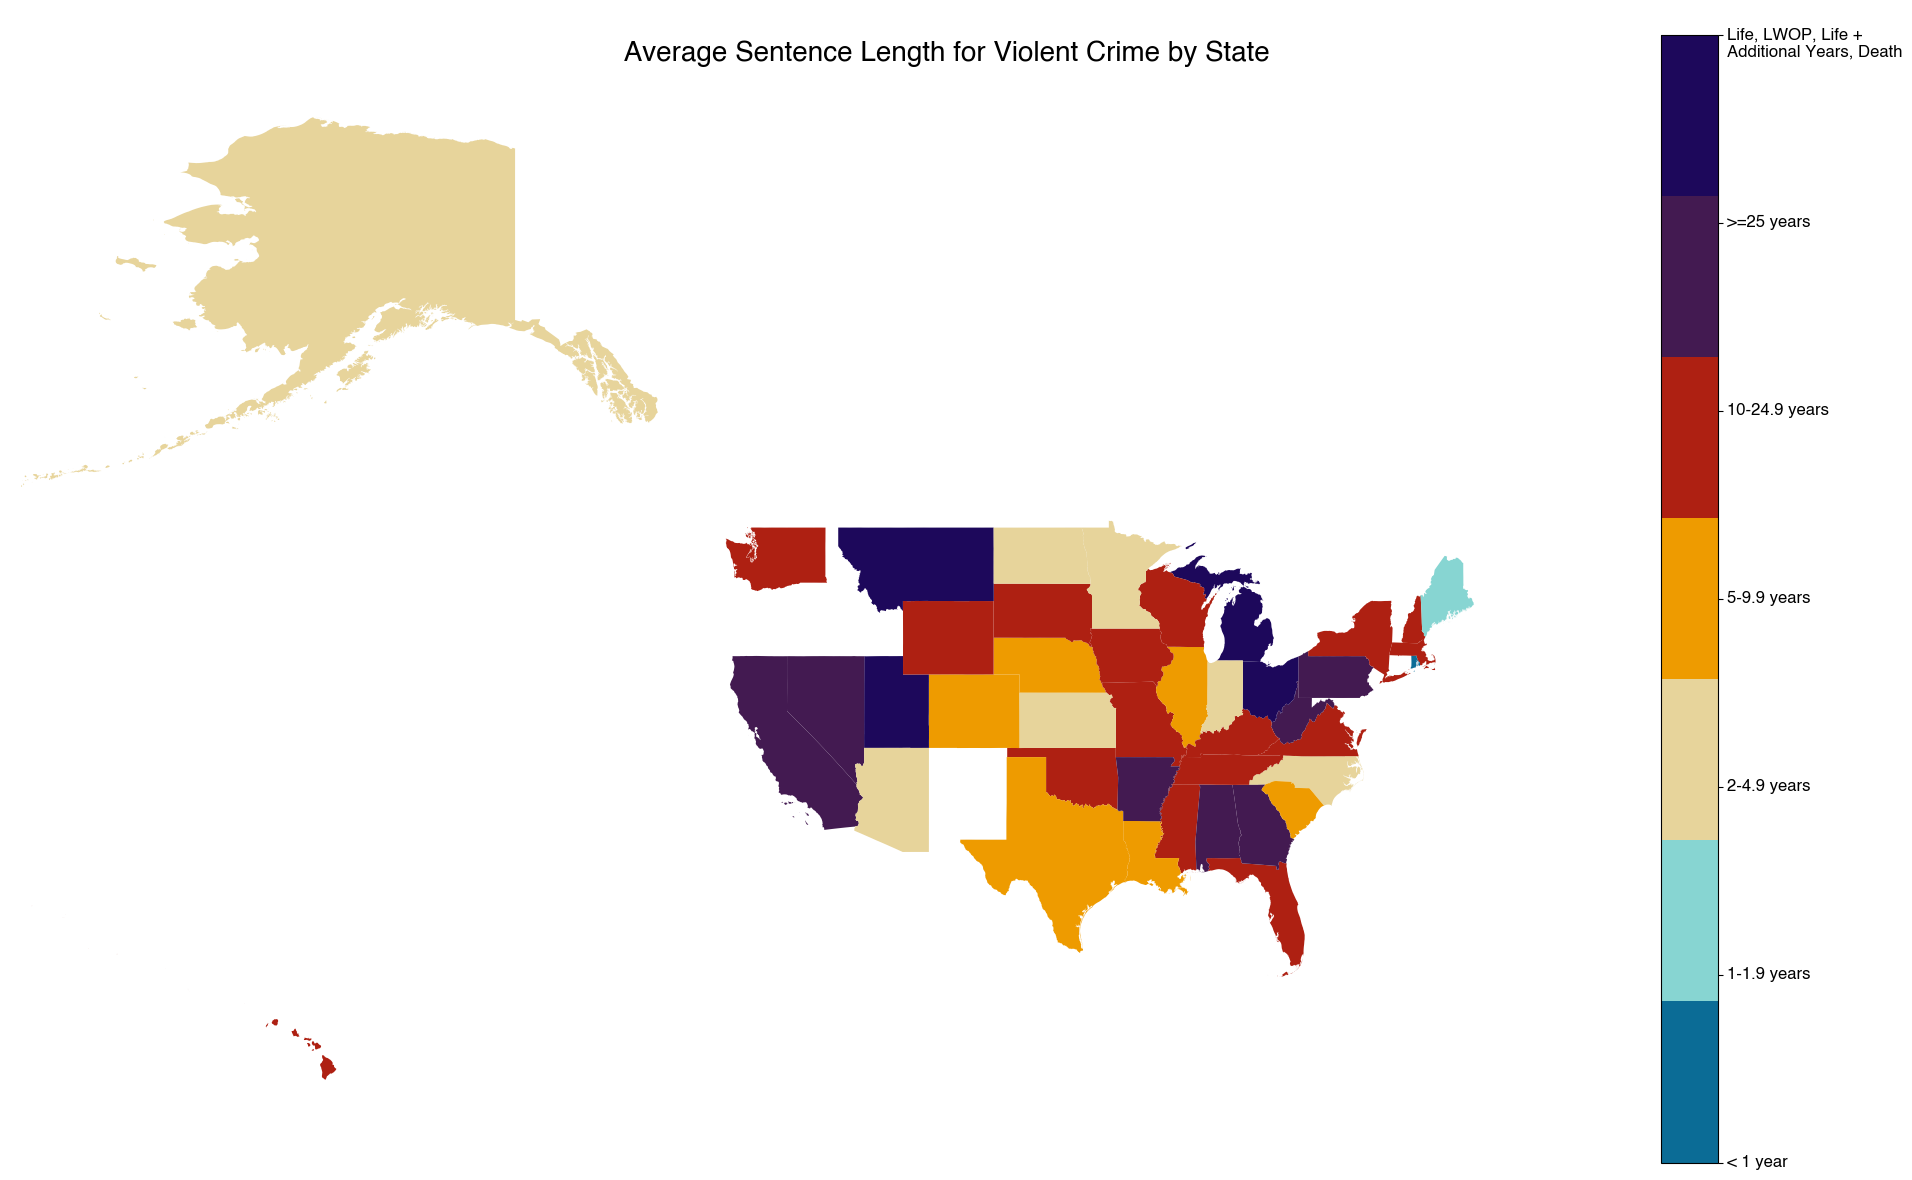

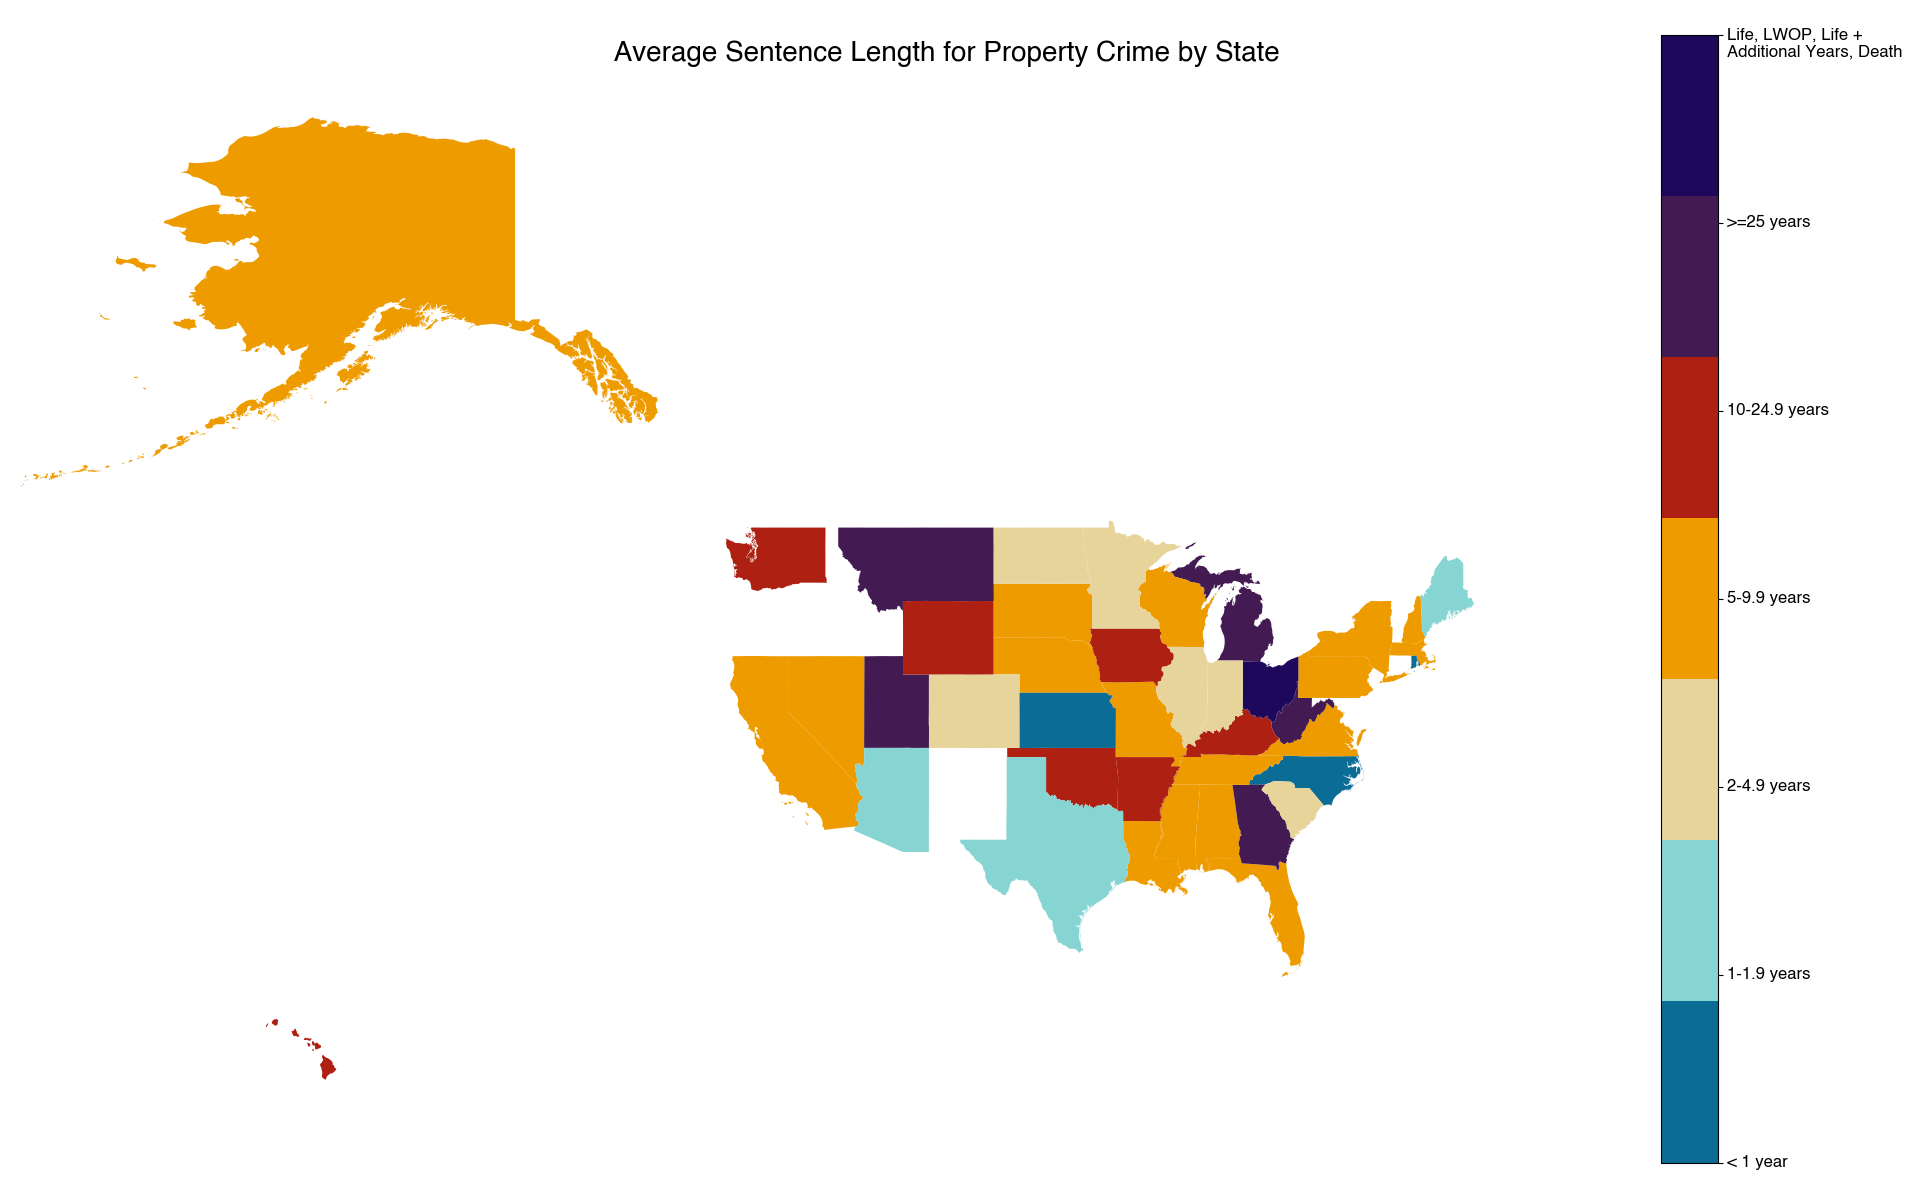

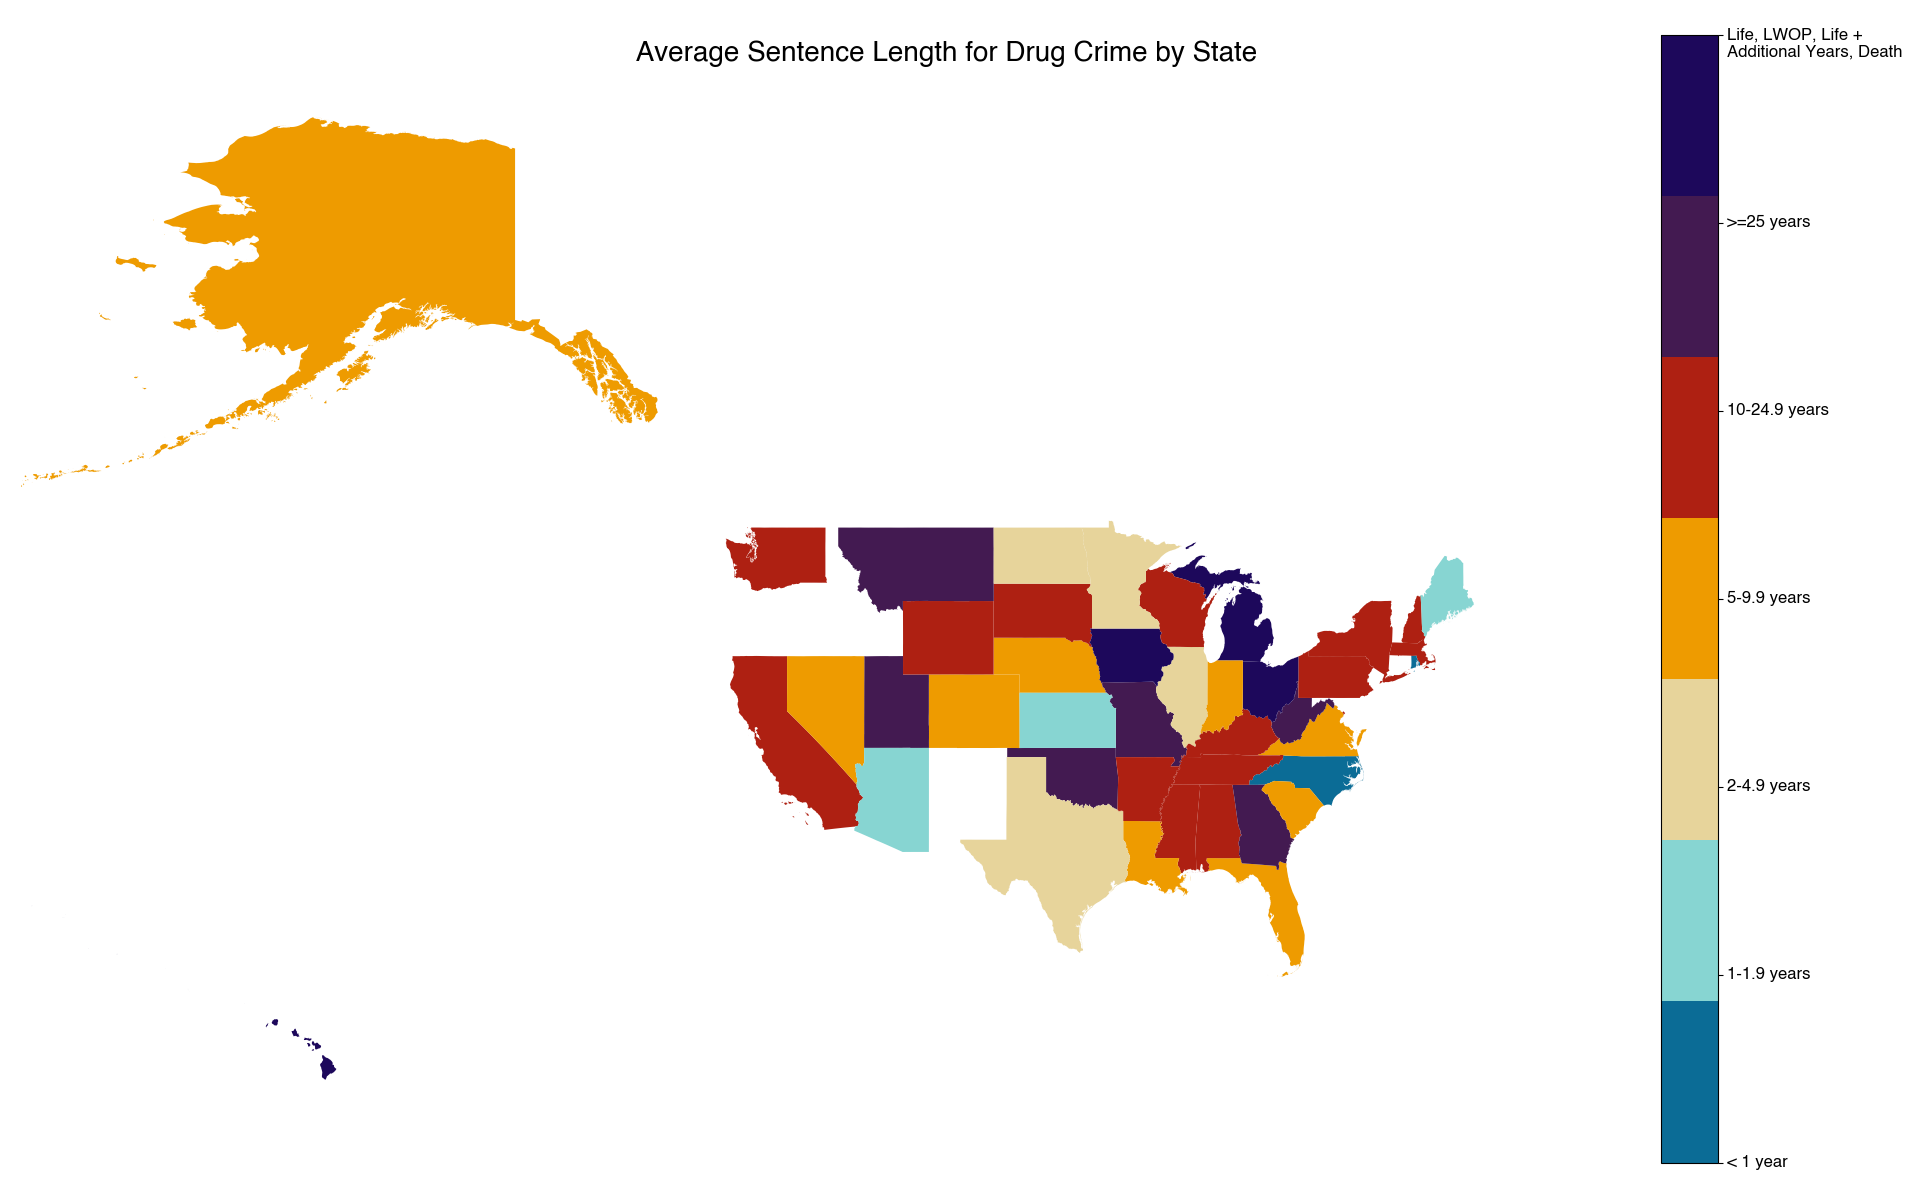

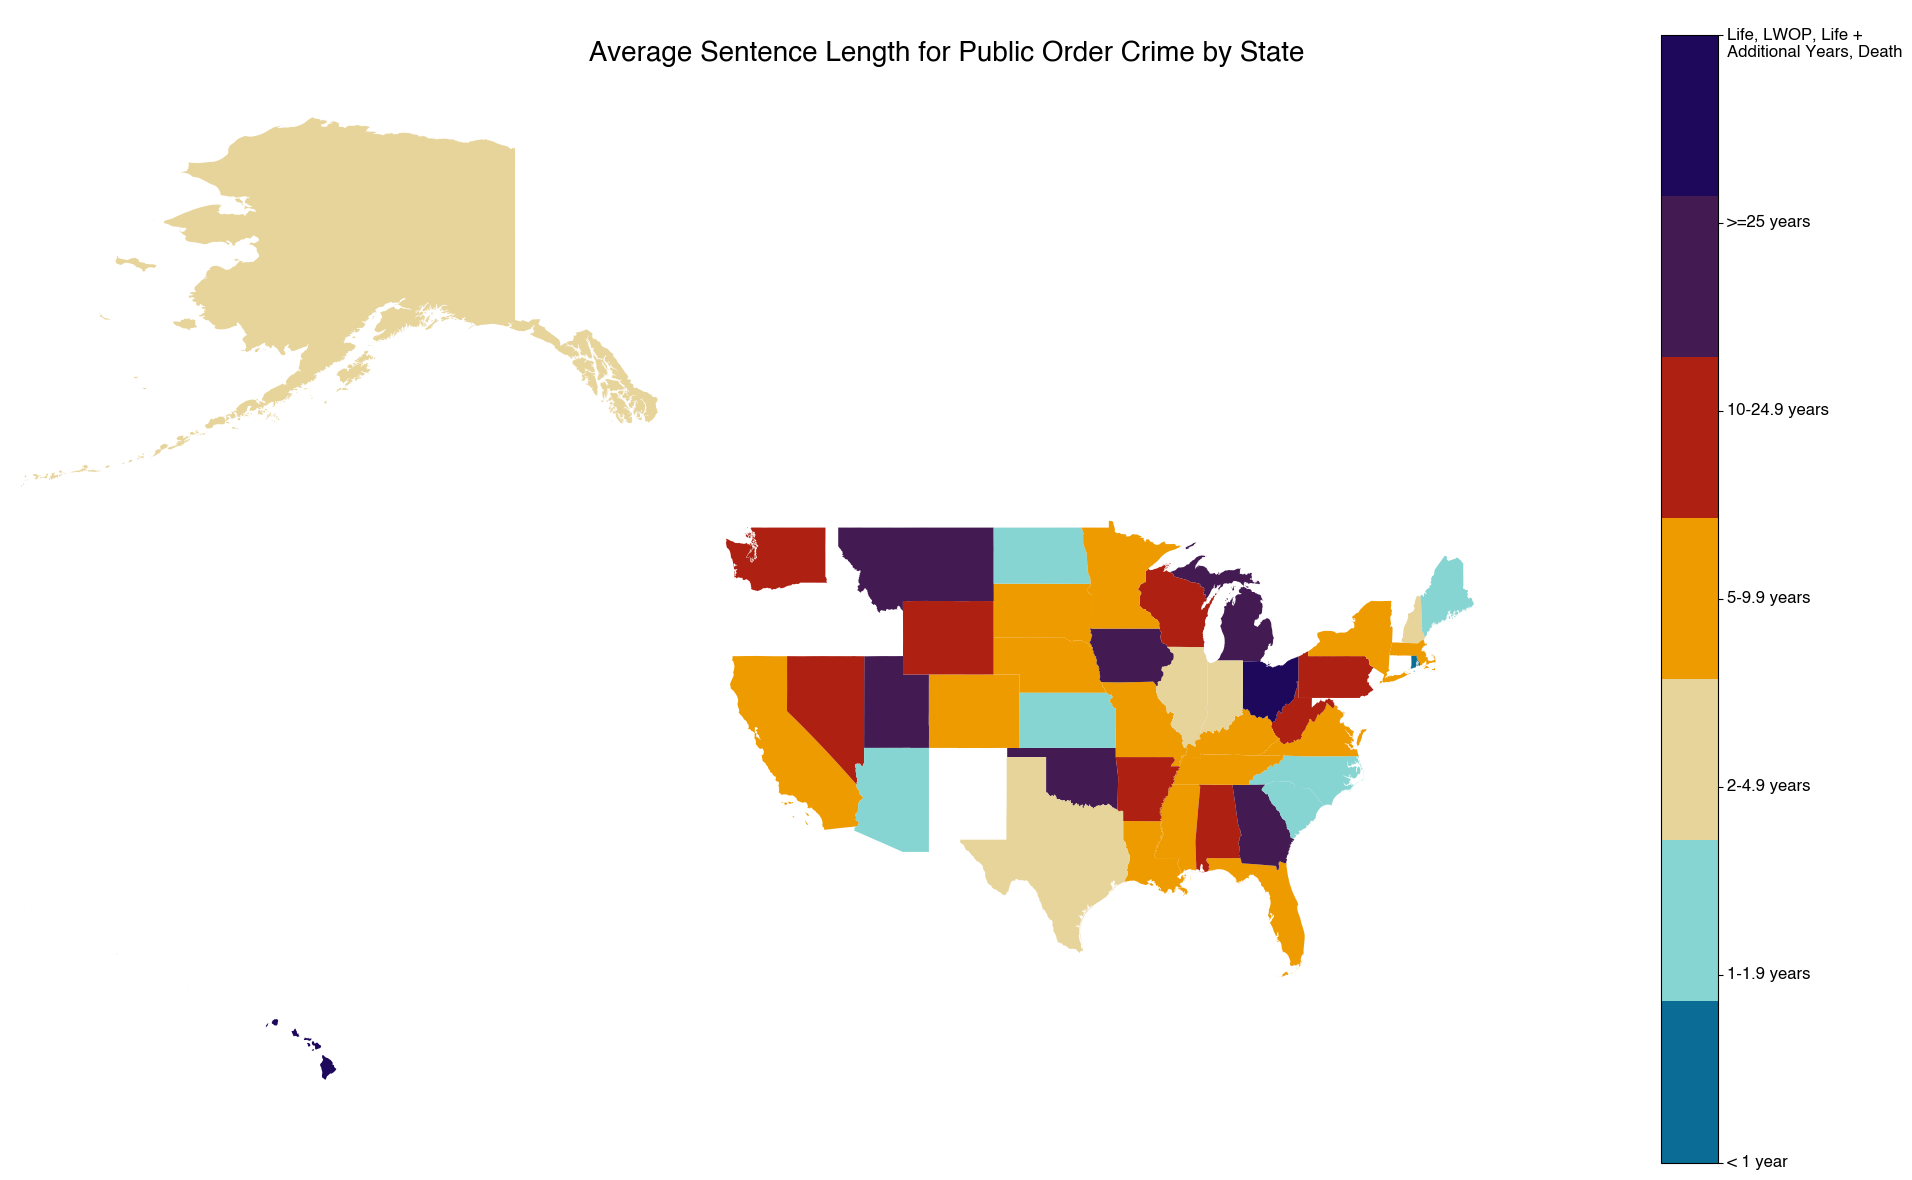

In [161]:
off_general = ['Violent', 'Property', 'Drug', 'Public Order']
legend_labels = ["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "Life, LWOP, Life + \nAdditional Years, Death"]

for index, offense in enumerate(off_general):
    sentence_length = []
    for state in state_codes:
        new_df = one_hot_df[one_hot_df[state] == 1]
        new_df = new_df[new_df['OFFGENERAL'] == index+1]
        sentence_length.append(new_df['SENTLGTH'].mean())

    # create a new dataframe with two columns, state and sentence
    sentences = pd.DataFrame({'state': state_codes, 'sentences': sentence_length})

    # Merge dataframes gdf and prisoners
    merged = gdf.merge(sentences, left_on = 'state', right_on = 'state')

    fig, ax = plt.subplots()
    # Plot a choropleth map using the "prisoners" column
    merged.plot(column='sentences', cmap=cmap, legend=False, ax=ax)

    # create a colorbar with labels
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm._A = []
    # label the colorbar
    cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
    cbar.ax.set_yticks(np.linspace(0, 1, len(sentence_map)))
    cbar.ax.set_yticklabels(sentence_map, **font, fontsize=12, verticalalignment='center')

    # make the extra white space around the plot smaller
    plt.tight_layout()
    # make the x axis shorter
    plt.xlim(-180,-60)
    # make the figure larger
    plt.rcParams['figure.figsize'] = [20, 15]

    plt.title('\n Average Sentence Length for ' + offense + ' Crime by State', **font, fontsize=20)
    plt.subplots_adjust(top=0.95)
    # move plt.title 3 points to the right
    ttl = ax.title
    ttl.set_position([0.6,0.05])

    # remove x and y axis
    plt.axis('off')
    plt.savefig('Results/sentence_length_' + offense + '.png')
    plt.show()

In [14]:
merged.head()

,state,geometry,prisoners
0,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",128094
1,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",493257
2,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",95242
3,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",108564
4,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",52376


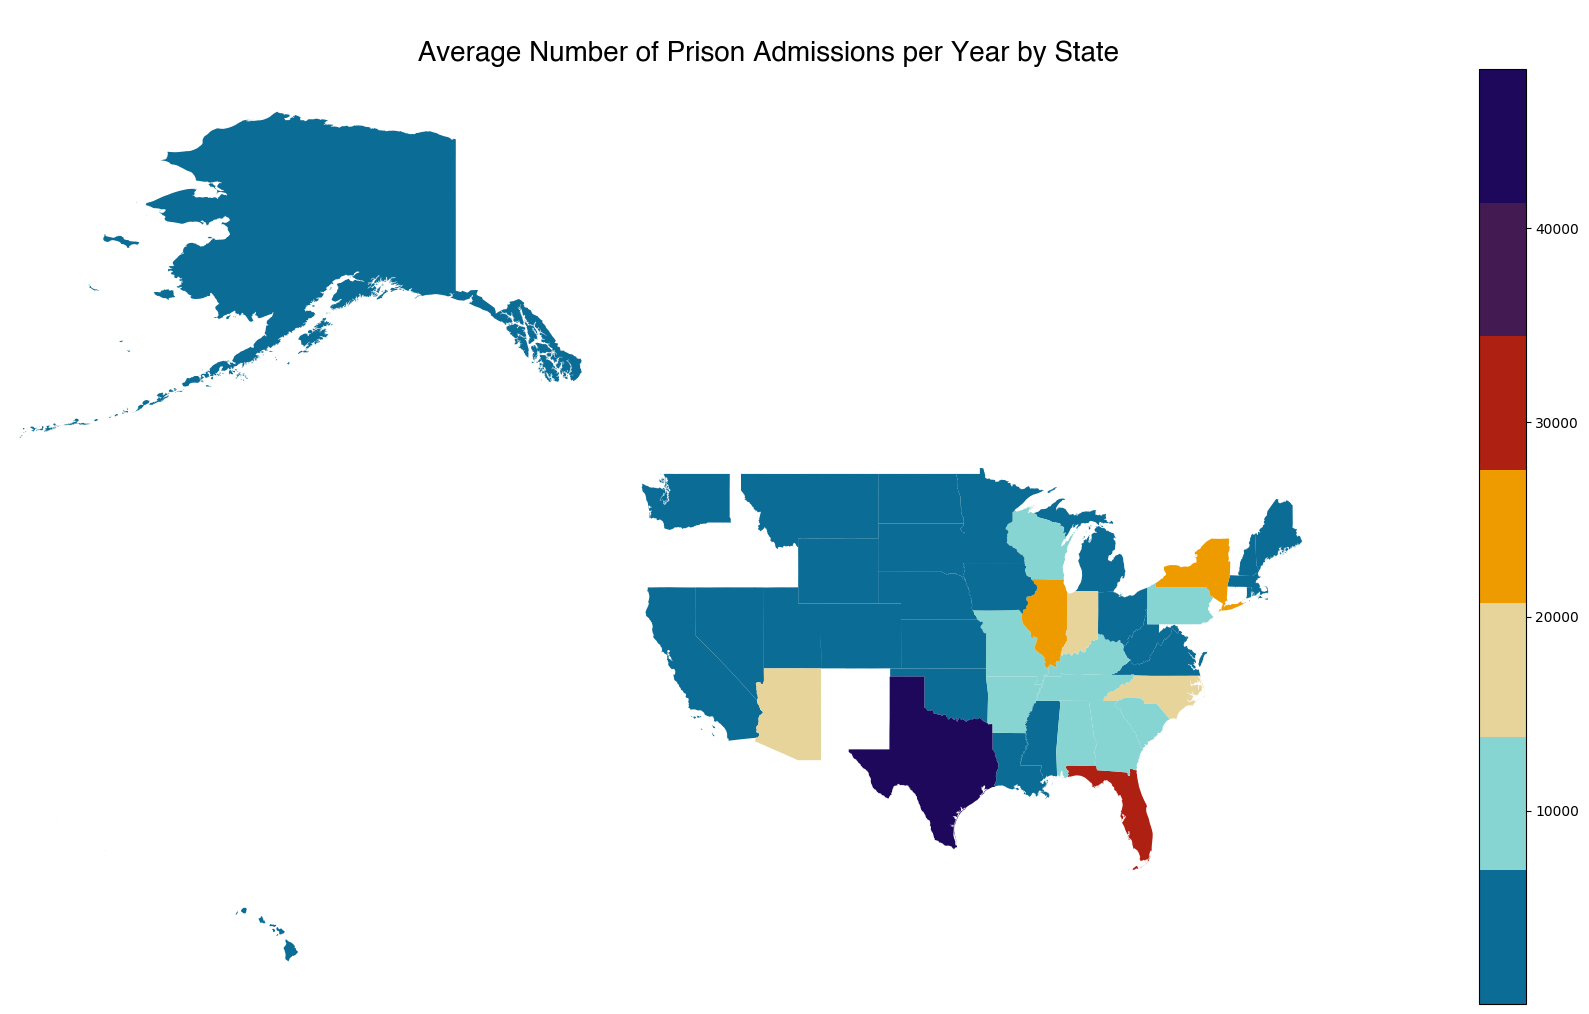

In [170]:
fig, ax = plt.subplots()
# Plot a choropleth map using the "prisoners" column
total_merged.plot(column='prisoners', cmap=cmap, legend=True, ax=ax)
# make the extra white space around the plot smaller
plt.tight_layout()
# make the x axis shorter
plt.xlim(-180,-60)
# make the figure larger
plt.rcParams['figure.figsize'] = [20, 10]

plt.title('\n Average Number of Prison Admissions per Year by State', **font, fontsize=20)
plt.subplots_adjust(top=0.95)
# move plt.title 3 points to the right
ttl = ax.title
ttl.set_position([0.55,1.02])

# remove x and y axis
plt.axis('off')
plt.savefig('Results/prisonersAvg.png')
plt.show()

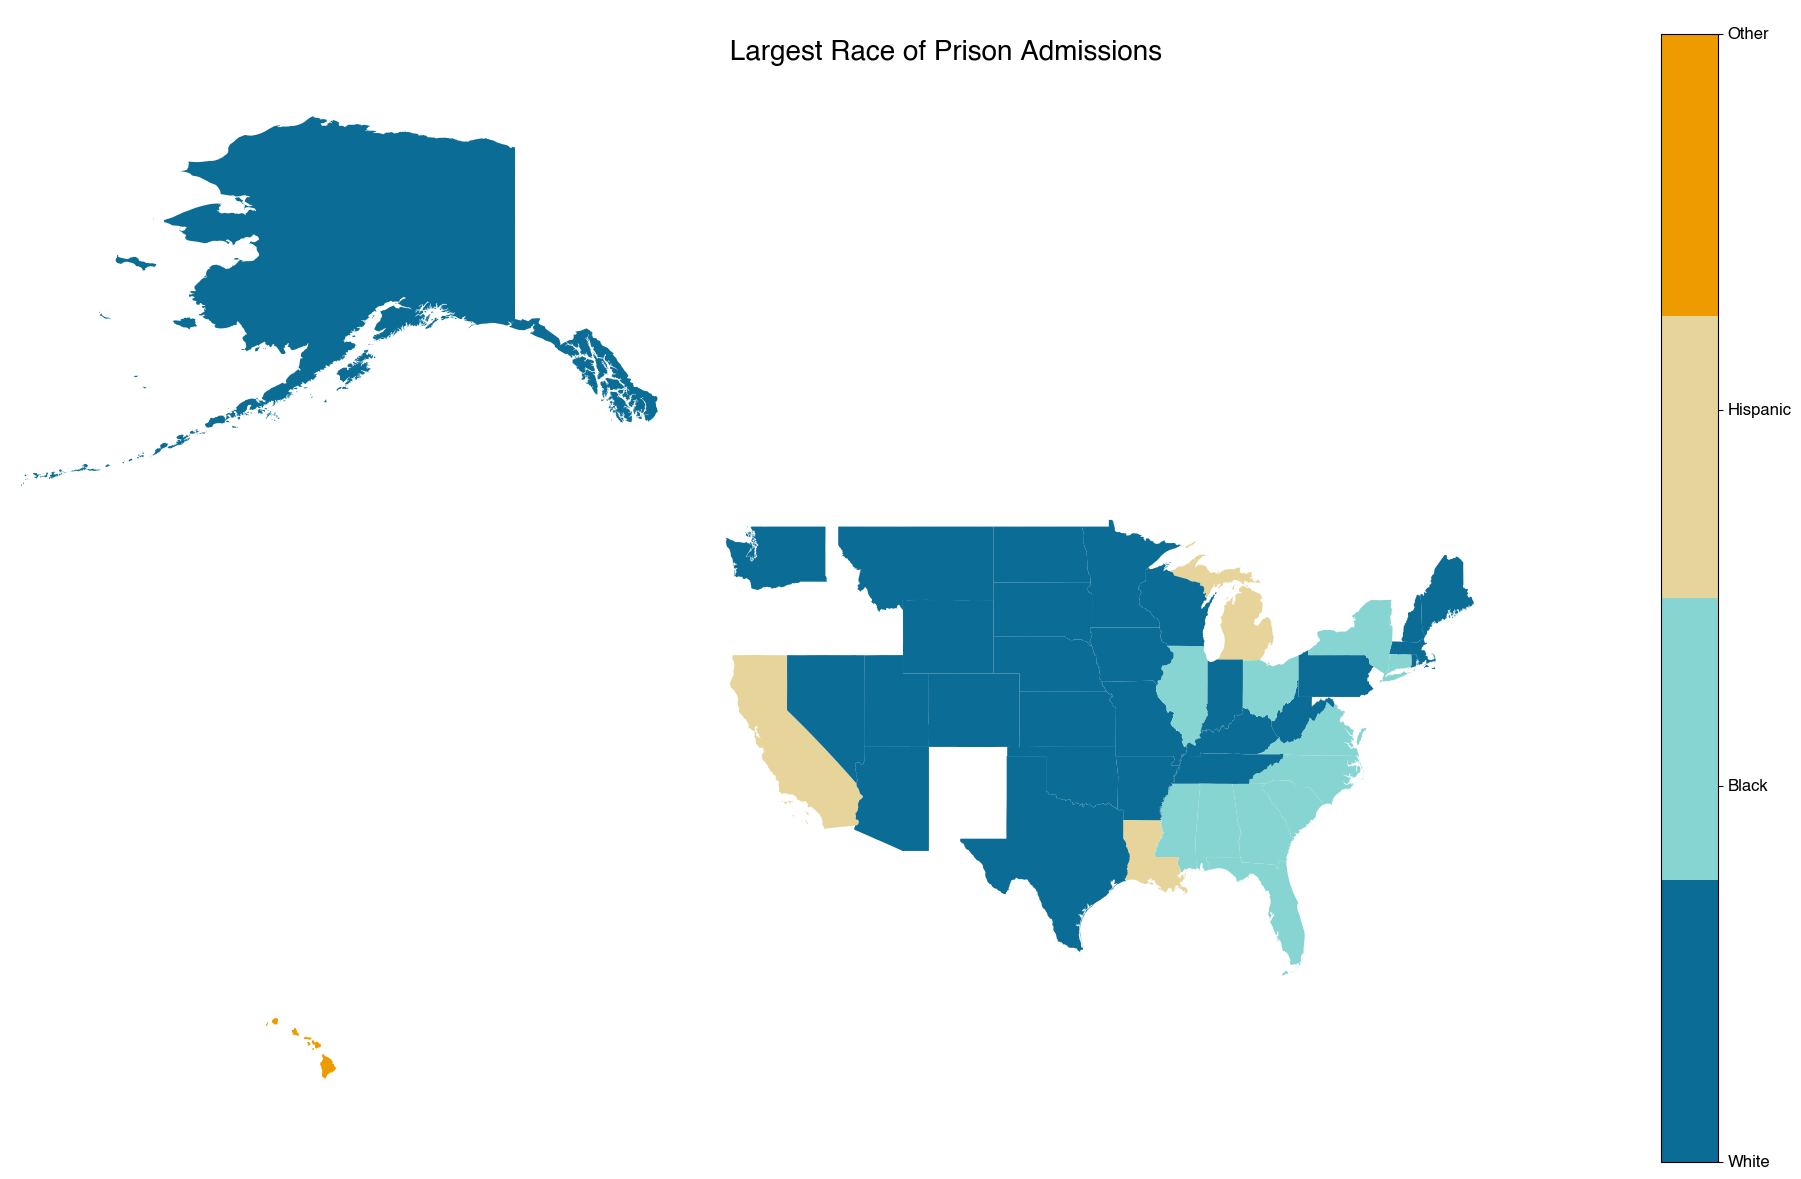

In [183]:
race_map = ['White', 'Black', 'Hispanic', 'Other']
# Define custom colormap
cmap = ListedColormap(['#0b6c96', '#87d5d2', '#e7d49b', '#ee9b00'])


fig, ax = plt.subplots()
# Plot a choropleth map using the "race" column
race_merged.plot(column='race', cmap=cmap, legend=False, ax=ax)
# create a colorbar with labels
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
# label the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.ax.set_yticks(np.linspace(0, 1, len(race_map)))
cbar.ax.set_yticklabels(race_map, **font, fontsize=12, verticalalignment='center')

# make the extra white space around the plot smaller
plt.tight_layout()
# make the x axis shorter
plt.xlim(-180,-60)
# make the figure larger
plt.rcParams['figure.figsize'] = [20, 15]

plt.title('\n Largest Race of Prison Admissions', **font, fontsize=20)
plt.subplots_adjust(top=0.95)
# move plt.title 3 points to the right
ttl = ax.title
ttl.set_position([0.6,0.05])

# remove x and y axis
plt.axis('off')
plt.savefig('Results/prisonAdmissionsRace.png')
plt.show()


In [2]:
# create a multicollinearity matrix
# randomyl sample 1000 rows from the one_hot_df
new_one_hot_df = one_hot_df.sample(n=1000)
corr = new_one_hot_df.corr()
corr.style.background_gradient(cmap='coolwarm')


/usr/local/lib/python3.10/site-packages/pandas/io/formats/style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/site-packages/pandas/io/formats/style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,SEX,STATE,EDUCATION,OFFGENERAL,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,HI,IA,IL,IN,KS,KY,LA,MA,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NV,NY,OH,OK,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY,black,hispanic,other,white,assault,burglary,drugs,fraud,larceny,motor vehicle theft,murder,negligent manslaugher,other property,other violent,public order,rape/SA,robbery,unspecified
SEX,1.000000,0.044072,-0.020510,0.083258,0.019903,-0.129900,0.096755,-0.079374,-0.011150,nan,0.007736,0.008379,0.011502,-0.021124,0.001986,nan,-0.010546,0.006761,-0.019540,nan,0.050026,-0.032705,-0.066250,0.007484,-0.006671,nan,-0.014922,nan,-0.010546,-0.020057,0.017010,-0.048820,nan,0.015889,-0.018285,nan,-0.014922,0.033521,-0.025373,nan,-0.033501,-0.008040,-0.027987,0.031940,-0.014922,-0.027206,0.023338,-0.031766,0.034847,0.085717,0.044452,0.024491,-0.014922,-0.071597,-0.040944,0.007736,0.097257,-0.025657,-0.061466,0.035189,0.085925,0.053765,-0.002325,-0.006123,0.074121,-0.001681,-0.023810,0.016284,-0.078069,-0.077595,0.060721
STATE,0.044072,1.000000,-0.004569,-0.042565,0.113411,-0.042241,-0.058509,0.005708,0.028448,nan,-0.245857,-0.264442,-0.356386,-0.098594,-0.247179,nan,-0.039296,-0.310934,-0.196356,nan,-0.084929,-0.248228,-0.159550,-0.060821,-0.094287,nan,-0.016273,nan,-0.009516,-0.032224,-0.022967,-0.025669,nan,0.105208,0.024808,nan,0.006200,0.009960,0.104006,nan,0.058066,0.152656,0.069582,0.184334,0.042718,0.193684,0.428389,0.108879,0.198840,0.153576,0.257815,0.160491,0.070809,0.013063,0.006382,-0.016738,-0.012991,0.011906,-0.058841,0.018417,0.023521,0.020229,0.017658,-0.013552,-0.025340,-0.111873,-0.040725,-0.034652,0.106767,0.053300,0.009793
EDUCATION,-0.020510,-0.004569,1.000000,0.014816,0.096069,0.039961,0.026357,-0.073955,0.159884,nan,-0.010288,0.019293,0.039687,0.017097,0.067777,nan,0.021014,-0.106458,-0.049664,nan,0.048372,0.047604,-0.107287,0.041937,0.080861,nan,-0.005579,nan,0.021014,0.066192,-0.057645,0.075272,nan,-0.014865,-0.021261,nan,0.029734,0.001916,-0.028756,nan,-0.028383,-0.015639,-0.001003,-0.021793,0.029734,-0.019444,0.056408,-0.087052,0.001072,0.015243,0.007536,-0.013736,0.029734,-0.041003,-0.039645,-0.022493,0.074111,-0.010981,-0.030383,0.037932,0.047944,-0.015286,0.009254,0.029732,0.029886,-0.013836,0.016002,-0.016263,-0.043402,-0.012144,0.009544
OFFGENERAL,0.083258,-0.042565,0.014816,1.000000,0.007381,-0.235986,0.925059,-0.054703,0.144668,nan,-0.028558,0.020476,0.067823,-0.024343,-0.010002,nan,0.017781,0.013854,-0.012091,nan,0.022735,0.050498,0.002830,-0.002634,0.010490,nan,0.046335,nan,0.017781,-0.080470,0.047122,-0.023266,nan,-0.017318,0.013528,nan,-0.017196,-0.028558,-0.024066,nan,-0.057623,-0.042307,-0.009555,-0.003082,-0.038372,-0.021673,0.024244,-0.056642,0.032491,0.009801,-0.019315,0.018490,0.025158,-0.095550,0.026869,-0.035877,0.084394,-0.394922,-0.132964,0.360913,-0.084348,-0.110946,-0.056258,-0.146602,-0.126768,-0.079424,-0.190033,0.663079,-0.311548,-0.362140,0.258827
ADMITYR,0.019903,0.113411,0.096069,0.007381,1.000000,-0.050595,-0.016355,0.033467,0.108442,nan,-0.191812,0.062090,0.050884,0.051352,0.020265,nan,-0.058737,-0.193457,-0.074833,nan,0.029259,0.002653,0.076001,0.091752,0.098728,nan,0.018804,nan,-0.042273,-0.044890,-0.064951,-0.041454,nan,0.045252,0.009959,nan,-0.077284,-0.074072,-0.090888,nan,-0.024462,0.082083,0.042289,-0.069614,-0.053990,0.042128,0.213713,0.033832,-0.020828,-0.032559,-0.083261,0.041514,0.024628,-0.128011,0.098938,0.048699,0.043559,0.048657,-0.007995,-0.059262,-0.030718,-0.021406,0.079213,0.041514,0.026945,-0.019098,-0.014328,0.056525,-0.012358,-0.015757,0.014990
SENTLGTH,-0.129900,-0.042241,0.039961,-0.235986,-0.050595,1.000000,-0.295057,-0.042665,-0.007768,nan,0.069391,0.059398,-0.123024,0.010906,-0.048658,nan,0.061693,-0.005106,0.176170,nan,0.110781,-0.047252,-0.029026,-0.000511,0.080960,nan,0.023621,nan,0.039194,0.012602,0.056902,0.037604,nan,-0.221870,0.002939,nan,-0.008213,-0.007624,0.064621,nan,0.053032,0.107679,-0.075111,-0.020004,0.039538,0.050187,-0.172370,0.140644,-0